In [98]:
# !kaggle datasets download -d utsavdey1410/food-nutrition-dataset
# https://www.kaggle.com/datasets/utsavdey1410/food-nutrition-dataset

In [99]:
# !unzip *.zip -d data1/
# 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.feature_extraction import DictVectorizer

In [101]:
df = pd.read_csv(
    "data1/FINAL FOOD DATASET/FOOD-DATA-GROUP5.csv",
    engine="python",          # more flexible parser
    on_bad_lines="warn"       # or "skip" to silently drop bad lines
)

df.head()


,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,margarine with yoghurt,88,9.8,1.9,5.6,2.0,0.073,0.0,...,2.8,0.001,0.027,0.3,0.0,2.2,3.5,0.000,0.008,12.971
1,1,1,sunflower seed butter,99,8.8,0.7,6.2,1.6,3.700,1.7,...,10.2,0.300,0.700,49.8,0.3,106.6,92.2,0.075,0.800,27.500
2,2,2,hazelnut oil,120,13.6,1.0,10.6,1.4,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,13.600
3,3,3,menhaden fish oil,1966,218.0,66.3,58.2,74.5,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,218.000
4,4,4,cod liver fish oil,123,13.6,3.1,6.4,3.1,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,17.700


In [102]:
df.shape

(722, 37)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          722 non-null    int64  
 1   Unnamed: 0            722 non-null    int64  
 2   food                  722 non-null    object 
 3   Caloric Value         722 non-null    int64  
 4   Fat                   722 non-null    float64
 5   Saturated Fats        722 non-null    float64
 6   Monounsaturated Fats  722 non-null    float64
 7   Polyunsaturated Fats  722 non-null    float64
 8   Carbohydrates         722 non-null    float64
 9   Sugars                722 non-null    float64
 10  Protein               722 non-null    float64
 11  Dietary Fiber         722 non-null    float64
 12  Cholesterol           722 non-null    float64
 13  Sodium                722 non-null    float64
 14  Water                 722 non-null    float64
 15  Vitamin A             7

In [104]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,...,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,360.500000,360.500000,124.490305,5.592144,1.829550,1.855496,1.696861,15.770335,3.097204,3.520122,...,37.683823,9.753963,1.015083,20.922909,5.474211,53.199550,200.918144,63.613301,0.370741,74.563083
std,208.567735,208.567735,218.128817,19.851477,11.135124,5.838940,6.403071,23.106365,7.878036,6.511791,...,84.010817,34.080257,2.050066,46.268267,15.408958,109.768044,427.455754,181.833341,0.775020,112.994961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,180.250000,180.250000,24.250000,0.200000,0.043250,0.039000,0.060250,2.025000,0.000000,0.300000,...,0.074000,0.032250,0.069250,0.700000,0.042000,0.300000,17.475000,0.018000,0.035000,13.600000
50%,360.500000,360.500000,68.500000,0.700000,0.100000,0.100000,0.200000,8.150000,0.700000,1.800000,...,8.150000,0.089000,0.400000,5.850000,0.200000,14.150000,63.000000,0.058000,0.099500,35.300000
75%,540.750000,540.750000,123.000000,4.375000,0.875000,1.400000,1.000000,19.775000,3.000000,3.700000,...,35.225000,0.500000,1.100000,23.200000,0.900000,58.150000,191.350000,0.096000,0.400000,83.450000
max,721.000000,721.000000,1966.000000,218.000000,196.200000,95.900000,115.800000,190.100000,105.000000,67.900000,...,868.000000,348.000000,29.200000,520.800000,156.600000,1309.400000,4053.000000,1309.500000,9.100000,918.800000


In [105]:
df.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64

In [106]:
# df.columns = df.columns.str.lower().str.replace(' ','_')

In [107]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat',
       'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol',
       'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11',
       'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
       'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Zinc', 'Nutrition Density'],
      dtype='object')

In [108]:
df

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,margarine with yoghurt,88,9.800,1.900,5.600,2.000,0.073,0.000,...,2.8,0.001,0.027,0.300,0.000,2.200,3.5,0.000,0.008,12.971
1,1,1,sunflower seed butter,99,8.800,0.700,6.200,1.600,3.700,1.700,...,10.2,0.300,0.700,49.800,0.300,106.600,92.2,0.075,0.800,27.500
2,2,2,hazelnut oil,120,13.600,1.000,10.600,1.400,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,13.600
3,3,3,menhaden fish oil,1966,218.000,66.300,58.200,74.500,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,218.000
4,4,4,cod liver fish oil,123,13.600,3.100,6.400,3.100,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,17.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,717,717,jews ear,25,0.095,0.000,0.000,0.000,6.700,0.000,...,15.8,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
718,718,718,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.200,0.034,...,0.0,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
719,719,719,morel mushrooms,4,0.070,0.056,0.031,0.007,0.700,0.096,...,0.0,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
720,720,720,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.300,2.200,...,2.6,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [109]:
df.dtypes

Unnamed: 0.1              int64
Unnamed: 0                int64
food                     object
Caloric Value             int64
Fat                     float64
Saturated Fats          float64
Monounsaturated Fats    float64
Polyunsaturated Fats    float64
Carbohydrates           float64
Sugars                  float64
Protein                 float64
Dietary Fiber           float64
Cholesterol             float64
Sodium                  float64
Water                   float64
Vitamin A               float64
Vitamin B1              float64
Vitamin B11             float64
Vitamin B12             float64
Vitamin B2              float64
Vitamin B3              float64
Vitamin B5              float64
Vitamin B6              float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Calcium                 float64
Copper                  float64
Iron                    float64
Magnesium               float64
Manganes

# EDA

Text(0.5, 1.0, 'Nutrition Density')

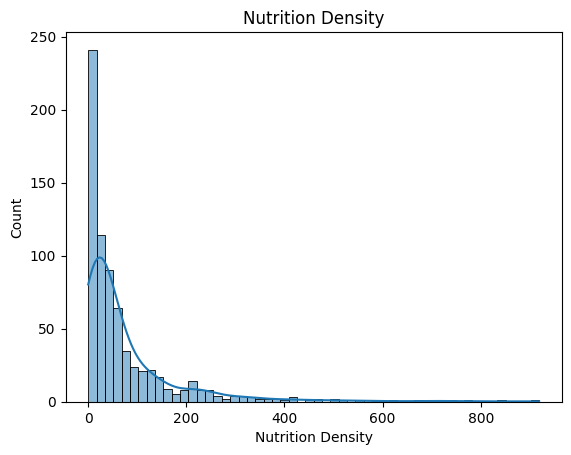

In [110]:
plt.figure()
sns.histplot(df['Nutrition Density'],kde=True)
plt.title('Nutrition Density')



In [111]:
nutrition_logs = np.log1p(df['Nutrition Density'])

<Axes: xlabel='Nutrition Density', ylabel='Count'>

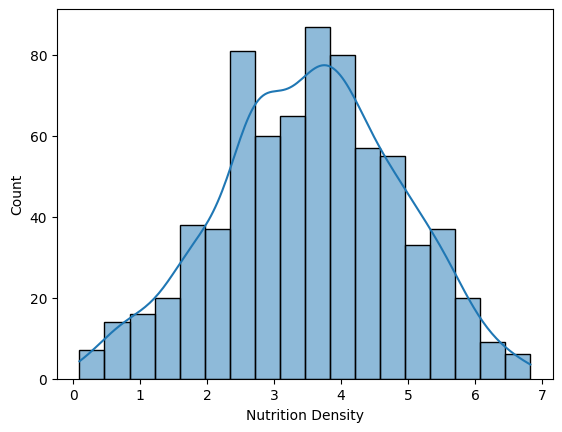

In [112]:
sns.histplot(nutrition_logs, kde=True)

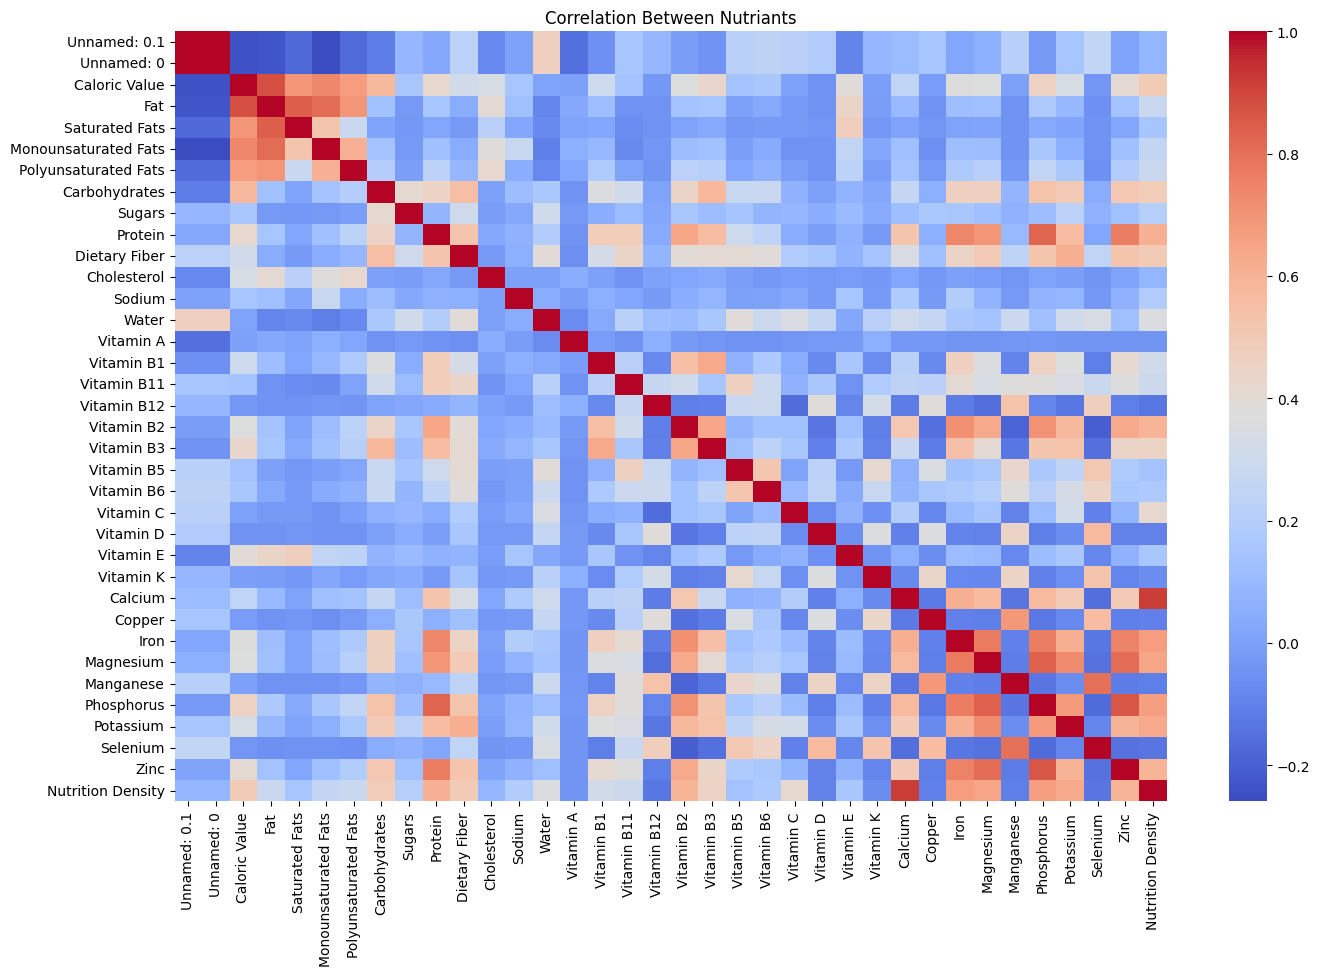

In [113]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=False)
plt.title('Correlation Between Nutriants')
plt.show()

In [114]:
df_sorted = df.sort_values(by='Nutrition Density', ascending=False)

top_foods = df_sorted[['food','Nutrition Density']].head(10)
print(top_foods)

                           food  Nutrition Density
395                    tofu raw              918.8
443       oriental radish dried              848.6
374        azumaya tofu vitasoy              777.0
407                 soybean raw              734.0
693        taco salad taco bell              696.9
397           green soybean raw              677.3
652                rutabaga raw              622.2
266  taco flavor tortilla chips              586.5
602       lambs quarters cooked              552.2
591         mustard spinach raw              526.2


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)

In [117]:
len(df_train),len(df_val),len(df_test)

(432, 145, 145)

In [118]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [119]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat',
       'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol',
       'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11',
       'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
       'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Zinc', 'Nutrition Density'],
      dtype='object')

In [120]:
y_train = np.log1p(df_train['Nutrition Density'])
y_val = np.log1p(df_val['Nutrition Density'])
y_test = np.log1p(df_test['Nutrition Density'])



In [121]:
del df_train['Nutrition Density']
del df_val['Nutrition Density']
del df_test['Nutrition Density']

In [122]:
del df_train['food']
del df_val['food']
del df_test['food']

del df_train['Unnamed: 0.1']
del df_val['Unnamed: 0.1']
del df_test['Unnamed: 0.1']

del df_train['Unnamed: 0']
del df_val['Unnamed: 0']
del df_test['Unnamed: 0']

In [123]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
x_val = dv.transform(val_dict)

In [124]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_baseline = np.repeat(y_train.mean(), len(y_val))
mae_baseline = mean_absolute_error(y_val, y_pred_baseline)
rmse_baseline = mean_squared_error(y_val, y_pred_baseline)


In [125]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
}


In [126]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = mean_squared_error(y_val, y_val_pred)
    r2 = model.score(x_val, y_val)
    results.append((name, mae, rmse, r2))

pd.DataFrame(results, columns=["model", "mae", "rmse", "r2"])


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+02, tolerance: 7.793e-02
  model = cd_fast.enet_coordinate_descent(


,model,mae,rmse,r2
0,LinearRegression,0.640673,0.676343,0.655252
1,Ridge,0.646400,0.688199,0.649208
2,Lasso,0.647721,0.700848,0.642760


In [127]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [128]:
y_pred = dt.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_pred)).round(2)

np.float64(0.37)

In [129]:
rf=RandomForestRegressor(n_estimators=200,random_state=1)
rf.fit(x_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [130]:
y_pred=rf.predict(x_val)
np.sqrt(mean_squared_error(y_val,y_pred)).round(2)

np.float64(0.3)

In [131]:
trainn_acc=metrics.r2_score(y_val, y_pred)

trainn_acc

0.955629733084537

In [132]:
scores=[]
for n in range(10,201,10):
    rf=RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1)
    rf.fit(x_train,y_train)

    y_pred = rf.predict(x_val)
    score=np.sqrt(mean_squared_error(y_val, y_pred)).round(3)

    trainn_acc=metrics.r2_score(y_val, y_pred)

    scores.append((n,score,trainn_acc))

In [133]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse','trainn_acc'])
df_scores

,n_estimators,rmse,trainn_acc
0,10,0.323,0.946930
1,20,0.310,0.951080
2,30,0.299,0.954516
3,40,0.296,0.955327
4,50,0.287,0.957928
5,60,0.291,0.956934
6,70,0.291,0.956830
7,80,0.293,0.956322
8,90,0.298,0.954705
9,100,0.297,0.955134


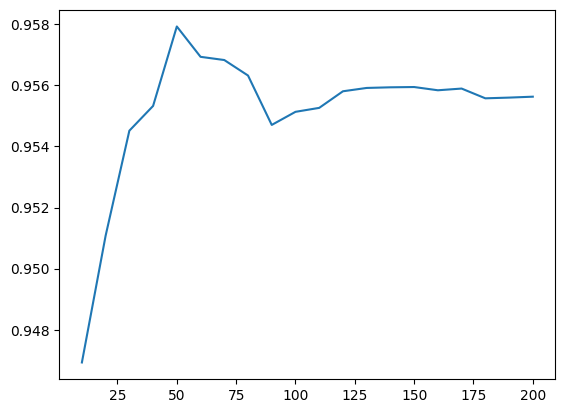

In [137]:
plt.plot(df_scores.n_estimators, df_scores.trainn_acc)

In [138]:
scores={}
for d in [10, 15, 20, 25]:
    for n in [50,60,70]:
        s=[]
        rf=RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1,max_depth=d)
        rf.fit(x_train,y_train)

        y_pred = rf.predict(x_val)
        score=np.sqrt(mean_squared_error(y_val, y_pred)).round(3)

        trainn_acc=metrics.r2_score(y_val, y_pred)
        s.append(trainn_acc)
    scores[d] = np.mean(s)
    print(f'for {d} value of r2 value {scores[d]}')

for 10 value of r2 value 0.9560965141324552
for 15 value of r2 value 0.9566371349449537
for 20 value of r2 value 0.9568295667236767
for 25 value of r2 value 0.9568295667236767


In [136]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [139]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=50,
        evals=watchlist
    )
y_pred = model.predict(dval)
val_r2 = metrics.r2_score(y_val, y_pred)
print(f"Validation R²: {val_r2:.4f}")

[0]	train-rmse:0.97791	val-rmse:1.07326
[1]	train-rmse:0.71649	val-rmse:0.82235
[2]	train-rmse:0.53057	val-rmse:0.65517
[3]	train-rmse:0.39450	val-rmse:0.54255
[4]	train-rmse:0.29679	val-rmse:0.45794
[5]	train-rmse:0.22618	val-rmse:0.39719
[6]	train-rmse:0.17589	val-rmse:0.36301
[7]	train-rmse:0.13791	val-rmse:0.33826
[8]	train-rmse:0.11101	val-rmse:0.32400
[9]	train-rmse:0.09077	val-rmse:0.31275
[10]	train-rmse:0.07504	val-rmse:0.30619
[11]	train-rmse:0.06319	val-rmse:0.29443
[12]	train-rmse:0.05521	val-rmse:0.29150
[13]	train-rmse:0.04723	val-rmse:0.28704
[14]	train-rmse:0.04180	val-rmse:0.28536
[15]	train-rmse:0.03721	val-rmse:0.28269
[16]	train-rmse:0.03275	val-rmse:0.28004
[17]	train-rmse:0.02993	val-rmse:0.27956
[18]	train-rmse:0.02761	val-rmse:0.27884
[19]	train-rmse:0.02524	val-rmse:0.27821
[20]	train-rmse:0.02276	val-rmse:0.27661
[21]	train-rmse:0.02094	val-rmse:0.27682
[22]	train-rmse:0.01813	val-rmse:0.27605
[23]	train-rmse:0.01739	val-rmse:0.27585
[24]	train-rmse:0.01588	va

In [140]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=50,
        evals=watchlist
    )
y_pred = model.predict(dval)
val_r2 = metrics.r2_score(y_val, y_pred)
print(f"Validation R²: {val_r2:.4f}")

[0]	train-rmse:1.22065	val-rmse:1.29824
[1]	train-rmse:1.10952	val-rmse:1.18853
[2]	train-rmse:1.00936	val-rmse:1.08798
[3]	train-rmse:0.91883	val-rmse:1.00206
[4]	train-rmse:0.83669	val-rmse:0.92436
[5]	train-rmse:0.76211	val-rmse:0.85405
[6]	train-rmse:0.69496	val-rmse:0.79269
[7]	train-rmse:0.63348	val-rmse:0.73461
[8]	train-rmse:0.57823	val-rmse:0.68480
[9]	train-rmse:0.52753	val-rmse:0.63919
[10]	train-rmse:0.48200	val-rmse:0.60023
[11]	train-rmse:0.44028	val-rmse:0.56278
[12]	train-rmse:0.40270	val-rmse:0.52973
[13]	train-rmse:0.36845	val-rmse:0.49856
[14]	train-rmse:0.33835	val-rmse:0.47404
[15]	train-rmse:0.30995	val-rmse:0.44919
[16]	train-rmse:0.28443	val-rmse:0.42848
[17]	train-rmse:0.26110	val-rmse:0.41046
[18]	train-rmse:0.23986	val-rmse:0.39245
[19]	train-rmse:0.22087	val-rmse:0.37905
[20]	train-rmse:0.20351	val-rmse:0.36654
[21]	train-rmse:0.18729	val-rmse:0.35313
[22]	train-rmse:0.17264	val-rmse:0.34225
[23]	train-rmse:0.15936	val-rmse:0.33514
[24]	train-rmse:0.14749	va

In [142]:
results = []
max_depth_values = [2, 4,5, 6,7, 8,9, 10, 12]

for depth in max_depth_values:
    xgb_params = {
        'eta': 0.1, 
        'max_depth': depth,
        'min_child_weight': 1,
    
        'objective': 'reg:squarederror',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=50,
        evals=watchlist
    )
    y_pred = model.predict(dval)
    val_r2 = metrics.r2_score(y_val, y_pred)

    results.append((depth, val_r2))

for depth, val_r2 in results:
    print(f"{depth}  {val_r2}")
    

[0]	train-rmse:1.24400	val-rmse:1.31067
[1]	train-rmse:1.15778	val-rmse:1.21933
[2]	train-rmse:1.08262	val-rmse:1.14387
[3]	train-rmse:1.01199	val-rmse:1.07218
[4]	train-rmse:0.95158	val-rmse:1.01755
[5]	train-rmse:0.89530	val-rmse:0.96282
[6]	train-rmse:0.84197	val-rmse:0.91127
[7]	train-rmse:0.79398	val-rmse:0.86763
[8]	train-rmse:0.74781	val-rmse:0.82013
[9]	train-rmse:0.70563	val-rmse:0.78202
[10]	train-rmse:0.66816	val-rmse:0.74649
[11]	train-rmse:0.63519	val-rmse:0.71891
[12]	train-rmse:0.60380	val-rmse:0.68998
[13]	train-rmse:0.57305	val-rmse:0.66550
[14]	train-rmse:0.54691	val-rmse:0.64346
[15]	train-rmse:0.52195	val-rmse:0.62550
[16]	train-rmse:0.49845	val-rmse:0.60354
[17]	train-rmse:0.47701	val-rmse:0.58652
[18]	train-rmse:0.45865	val-rmse:0.56962
[19]	train-rmse:0.44033	val-rmse:0.55277
[20]	train-rmse:0.42367	val-rmse:0.54086
[21]	train-rmse:0.40880	val-rmse:0.53128
[22]	train-rmse:0.39449	val-rmse:0.52388
[23]	train-rmse:0.38143	val-rmse:0.51215
[24]	train-rmse:0.36652	va

In [143]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=50,
        evals=watchlist
    )
y_pred = model.predict(dval)
val_r2 = metrics.r2_score(y_val, y_pred)
print(f"Validation R²: {val_r2:.4f}")

[0]	train-rmse:1.22460	val-rmse:1.29895
[1]	train-rmse:1.11681	val-rmse:1.19487
[2]	train-rmse:1.01985	val-rmse:1.09773
[3]	train-rmse:0.93252	val-rmse:1.01437
[4]	train-rmse:0.85482	val-rmse:0.93733
[5]	train-rmse:0.78713	val-rmse:0.87859
[6]	train-rmse:0.72154	val-rmse:0.81692
[7]	train-rmse:0.66114	val-rmse:0.75656
[8]	train-rmse:0.60634	val-rmse:0.70390
[9]	train-rmse:0.55702	val-rmse:0.65854
[10]	train-rmse:0.51231	val-rmse:0.61509
[11]	train-rmse:0.47126	val-rmse:0.57651
[12]	train-rmse:0.43692	val-rmse:0.54645
[13]	train-rmse:0.40410	val-rmse:0.51685
[14]	train-rmse:0.37429	val-rmse:0.49053
[15]	train-rmse:0.34589	val-rmse:0.46510
[16]	train-rmse:0.32050	val-rmse:0.44341
[17]	train-rmse:0.29778	val-rmse:0.42581
[18]	train-rmse:0.27672	val-rmse:0.40778
[19]	train-rmse:0.25765	val-rmse:0.39124
[20]	train-rmse:0.24056	val-rmse:0.37750
[21]	train-rmse:0.22507	val-rmse:0.36307
[22]	train-rmse:0.21091	val-rmse:0.35303
[23]	train-rmse:0.19750	val-rmse:0.34158
[24]	train-rmse:0.18511	va